In [1]:
from gym.envs.mujoco.mujoco_env import MujocoEnv
from gym.utils import EzPickle
import numpy as np

from ray.rllib.env.apis.task_settable_env import TaskSettableEnv

In [2]:
import gym
from gym.envs.mujoco.mujoco_env import MujocoEnv
from ray.rllib.env.apis.task_settable_env import TaskSettableEnv
import numpy as np

class MujocoMultipleEnv(MujocoEnv,TaskSettableEnv):
    """ Environment encapsulating Ant, Hopper, Hummanoid, HalfCheetah, moving forwards or backwards
    Direction is defined as a scalar: +1.0 (forwards) or -1.0 (backwards)
    """

    def __init__(self, task_env_names=["HalfCheetah", "Ant", "Hopper"]):
        self.task_env_names = task_env_names
        self.task_envs = []
        for task_env_name in task_env_names:
            self.task_envs.append(gym.make(task_env_name))
        
        self.current_task = self.task_envs[0]

                
    def sample_tasks(self, n_tasks):
        return np.random.choice(range(0,len(self.task_env_names)), (n_tasks,))

    def set_task(self, task_no):
        self.current_task = self.task_envs[task_no]
        
    def get_task(self):
        return self.current_task
    
    def get_action_space(self):
        return self.current_task.action_space
    
    def step(self, action):
        ''' need to truncate action space here '''
        return self.current_task.step(action)
    
    def reset_model(self):
        self.current_task.reset()

    def viewer_setup(self):
        self.viewer.cam.distance = self.model.stat.extent * 0.5


In [3]:
multi_env = MujocoMultipleEnv()

/home/felix/Documents/RL/rl_maml_env/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `HalfCheetah-v3` instead of the unversioned environment `HalfCheetah`
  logger.warn(
/home/felix/Documents/RL/rl_maml_env/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `Ant-v3` instead of the unversioned environment `Ant`
  logger.warn(
/home/felix/Documents/RL/rl_maml_env/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `Hopper-v3` instead of the unversioned environment `Hopper`
  logger.warn(


In [4]:
multi_env.set_task(1)
#multi_env.get_task().render()

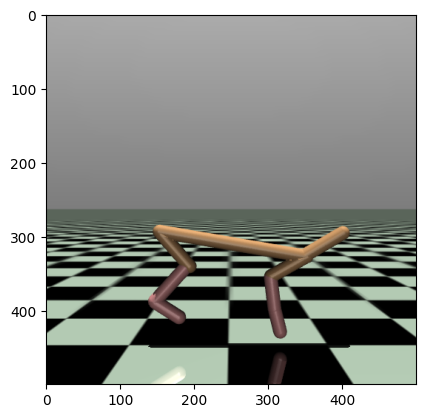

In [17]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

multi_env.set_task(0)
multi_env.reset_model()


for i in range(25):
    plt.imshow(multi_env.get_task().render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    multi_env.step(multi_env.get_action_space().sample()) # take a random action

multi_env.get_task().close()

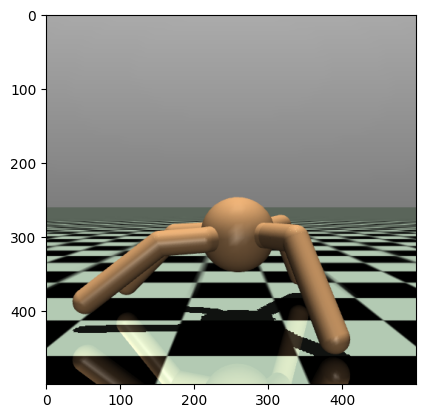

In [18]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

multi_env.set_task(1)
multi_env.reset_model()


for i in range(25):
    plt.imshow(multi_env.get_task().render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    multi_env.step(multi_env.get_action_space().sample()) # take a random action

multi_env.get_task().close()

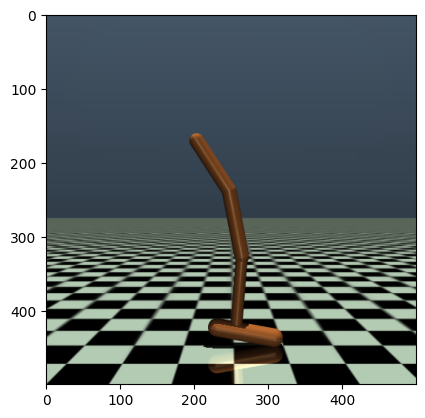

In [19]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

multi_env.set_task(2)
multi_env.reset_model()


for i in range(25):
    plt.imshow(multi_env.get_task().render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    multi_env.step(multi_env.get_action_space().sample()) # take a random action

multi_env.get_task().close()